# Electrostatics

In this exercise, we will perform electrostatics calculations in APBS and visualize the electrostatic potential.

We will perform the calculations on G protein α subunits. G proteins transduce signals from G protein coupled receptors (GPCRs) to various downstream effectors. When coupled to GPCRs, G proteins are heterotrimers including α, β, and γ subunits. After a GPCR is activated, the G proteins exchange GDP for GTP and dissociate into the α subunit and a dimer comprising the β and γ subunits.

GPCRs can couple with multiple G proteins. Moreover, different ligands can activate G proteins at different levels. Because G proteins have very similar structure, it is probable that selectivity is driven by electrostatics.


# Part I - Electrostatics calculations with APBS

We will perform electrostatics calculations on AlphaFold models of most different human G proteins. We will perform the calculations using the [PDB2PQR-APBS server](https://server.poissonboltzmann.org/). It is also possible to download the packages and perform the calculations on your own computer. Every student is assigned two G proteins to [in the Google Sheet](https://docs.google.com/spreadsheets/d/1hNEGYmObL56dELa9EqxD-smKl2J72hobuo6YPuZpxMo/edit?usp=sharing).  If you are not enrolled in the class, you could choose Gαi3 (UniProt P08754) and Gαq (UniProt P50148).

I have aligned models of most of these structures and put them [in a Google Drive Folder](https://drive.google.com/drive/folders/18q431ic1Yh7ZvxS3Awnv1C6-JctLGnhw?usp=sharing). If you hae been assigned Gαs(L), you will need to remove a long disordered region. If you have been assigned GαoB, you will need to build your own AlphaFold model as in a previous exercise. This is because GαoB is an isoform of GαoA from alternative splicing. Differences between GαoA and GαoB signaling have been shown to be physiologically significant.

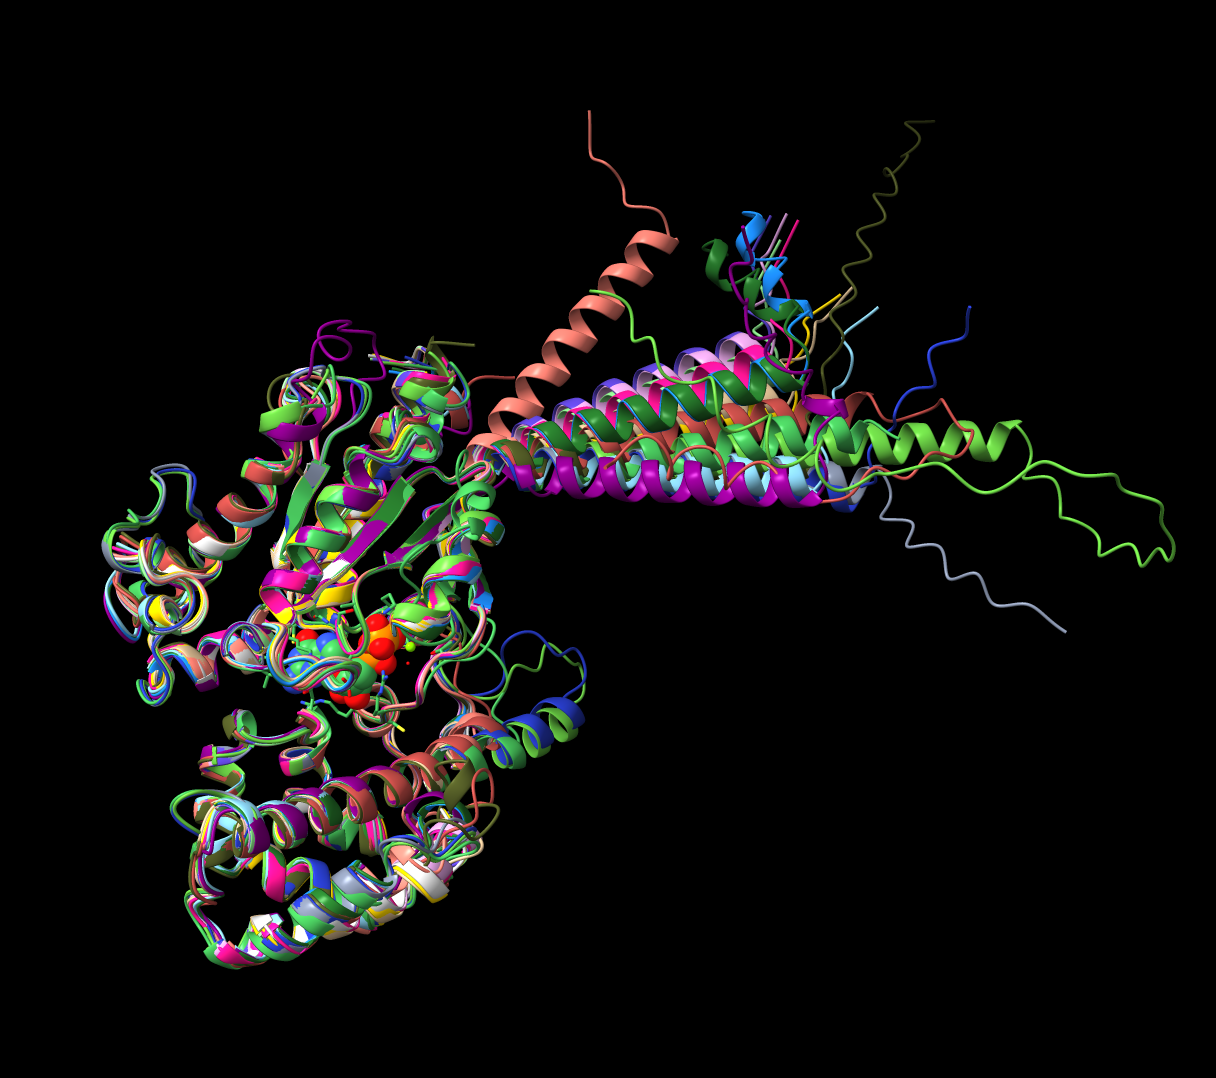

Fig. 1. Aligned G protein models. Stuctures are AlphaFold predictions in addition to Gs from PDB 6EG8. GDP from 6EG8 is shown with a sphere representation.


First, you should download the appropriate PDB files. The files are named `AF-[UniProt]-F1-model_v4.pdb`, where [UniProt] is the UniProt ID listed [in the Google Sheet](https://docs.google.com/spreadsheets/d/1hNEGYmObL56dELa9EqxD-smKl2J72hobuo6YPuZpxMo/edit?usp=sharing).

Next, run the calculations on the [PDB2PQR-APBS server](https://server.poissonboltzmann.org/). You should run one G protein at a time. Upload the PDB files to the [PDB2PQR-APBS server](https://server.poissonboltzmann.org/). Use calculation settings from the lecture on 9/18/2024.

--> Replace the G protein information and links below with your own:

Gαs, olf subtype (UniProtKB P38405):
https://server.poissonboltzmann.org/jobstatus?jobtype=apbs&jobid=t321tl09au&date=2024-09-20

Gαi, g subtype (UniProtKB A8MTJ3):
https://server.poissonboltzmann.org/jobstatus?jobtype=apbs&jobid=62egp799uu&date=2024-09-20

--> Download the pqr input file and the electrostatic potential dx file. Save them in your shared directory as `exercises/04-Electrostatics/APBS/[UniProt].pqr` and `exercises/04-Electrostatics/APBS/[UniProt]-pot.dx`.

Finally, use 3Dmol link on the server to visualize the molecular surface from several angles. First, mimic Fig. 1 from Baltoumas et. al. by orienting the protein with the N terminal helix pointing to the right and the C terminal helix pointing up. The N terminal helix may not point in precisely the same direction for all G proteins.

Baltoumas, F. A.; Theodoropoulou, M. C.; Hamodrakas, S. J. Interactions of the α-Subunits of Heterotrimeric G-Proteins with GPCRs, Effectors and RGS Proteins: A Critical Review and Analysis of Interacting Surfaces, Conformational Shifts, Structural Diversity and Electrostatic Potentials. Journal of Structural Biology 2013, 182 (3), 209–218. https://doi.org/10.1016/j.jsb.2013.03.004.

It may be helpful to use a transparent surface and cartoon representation.

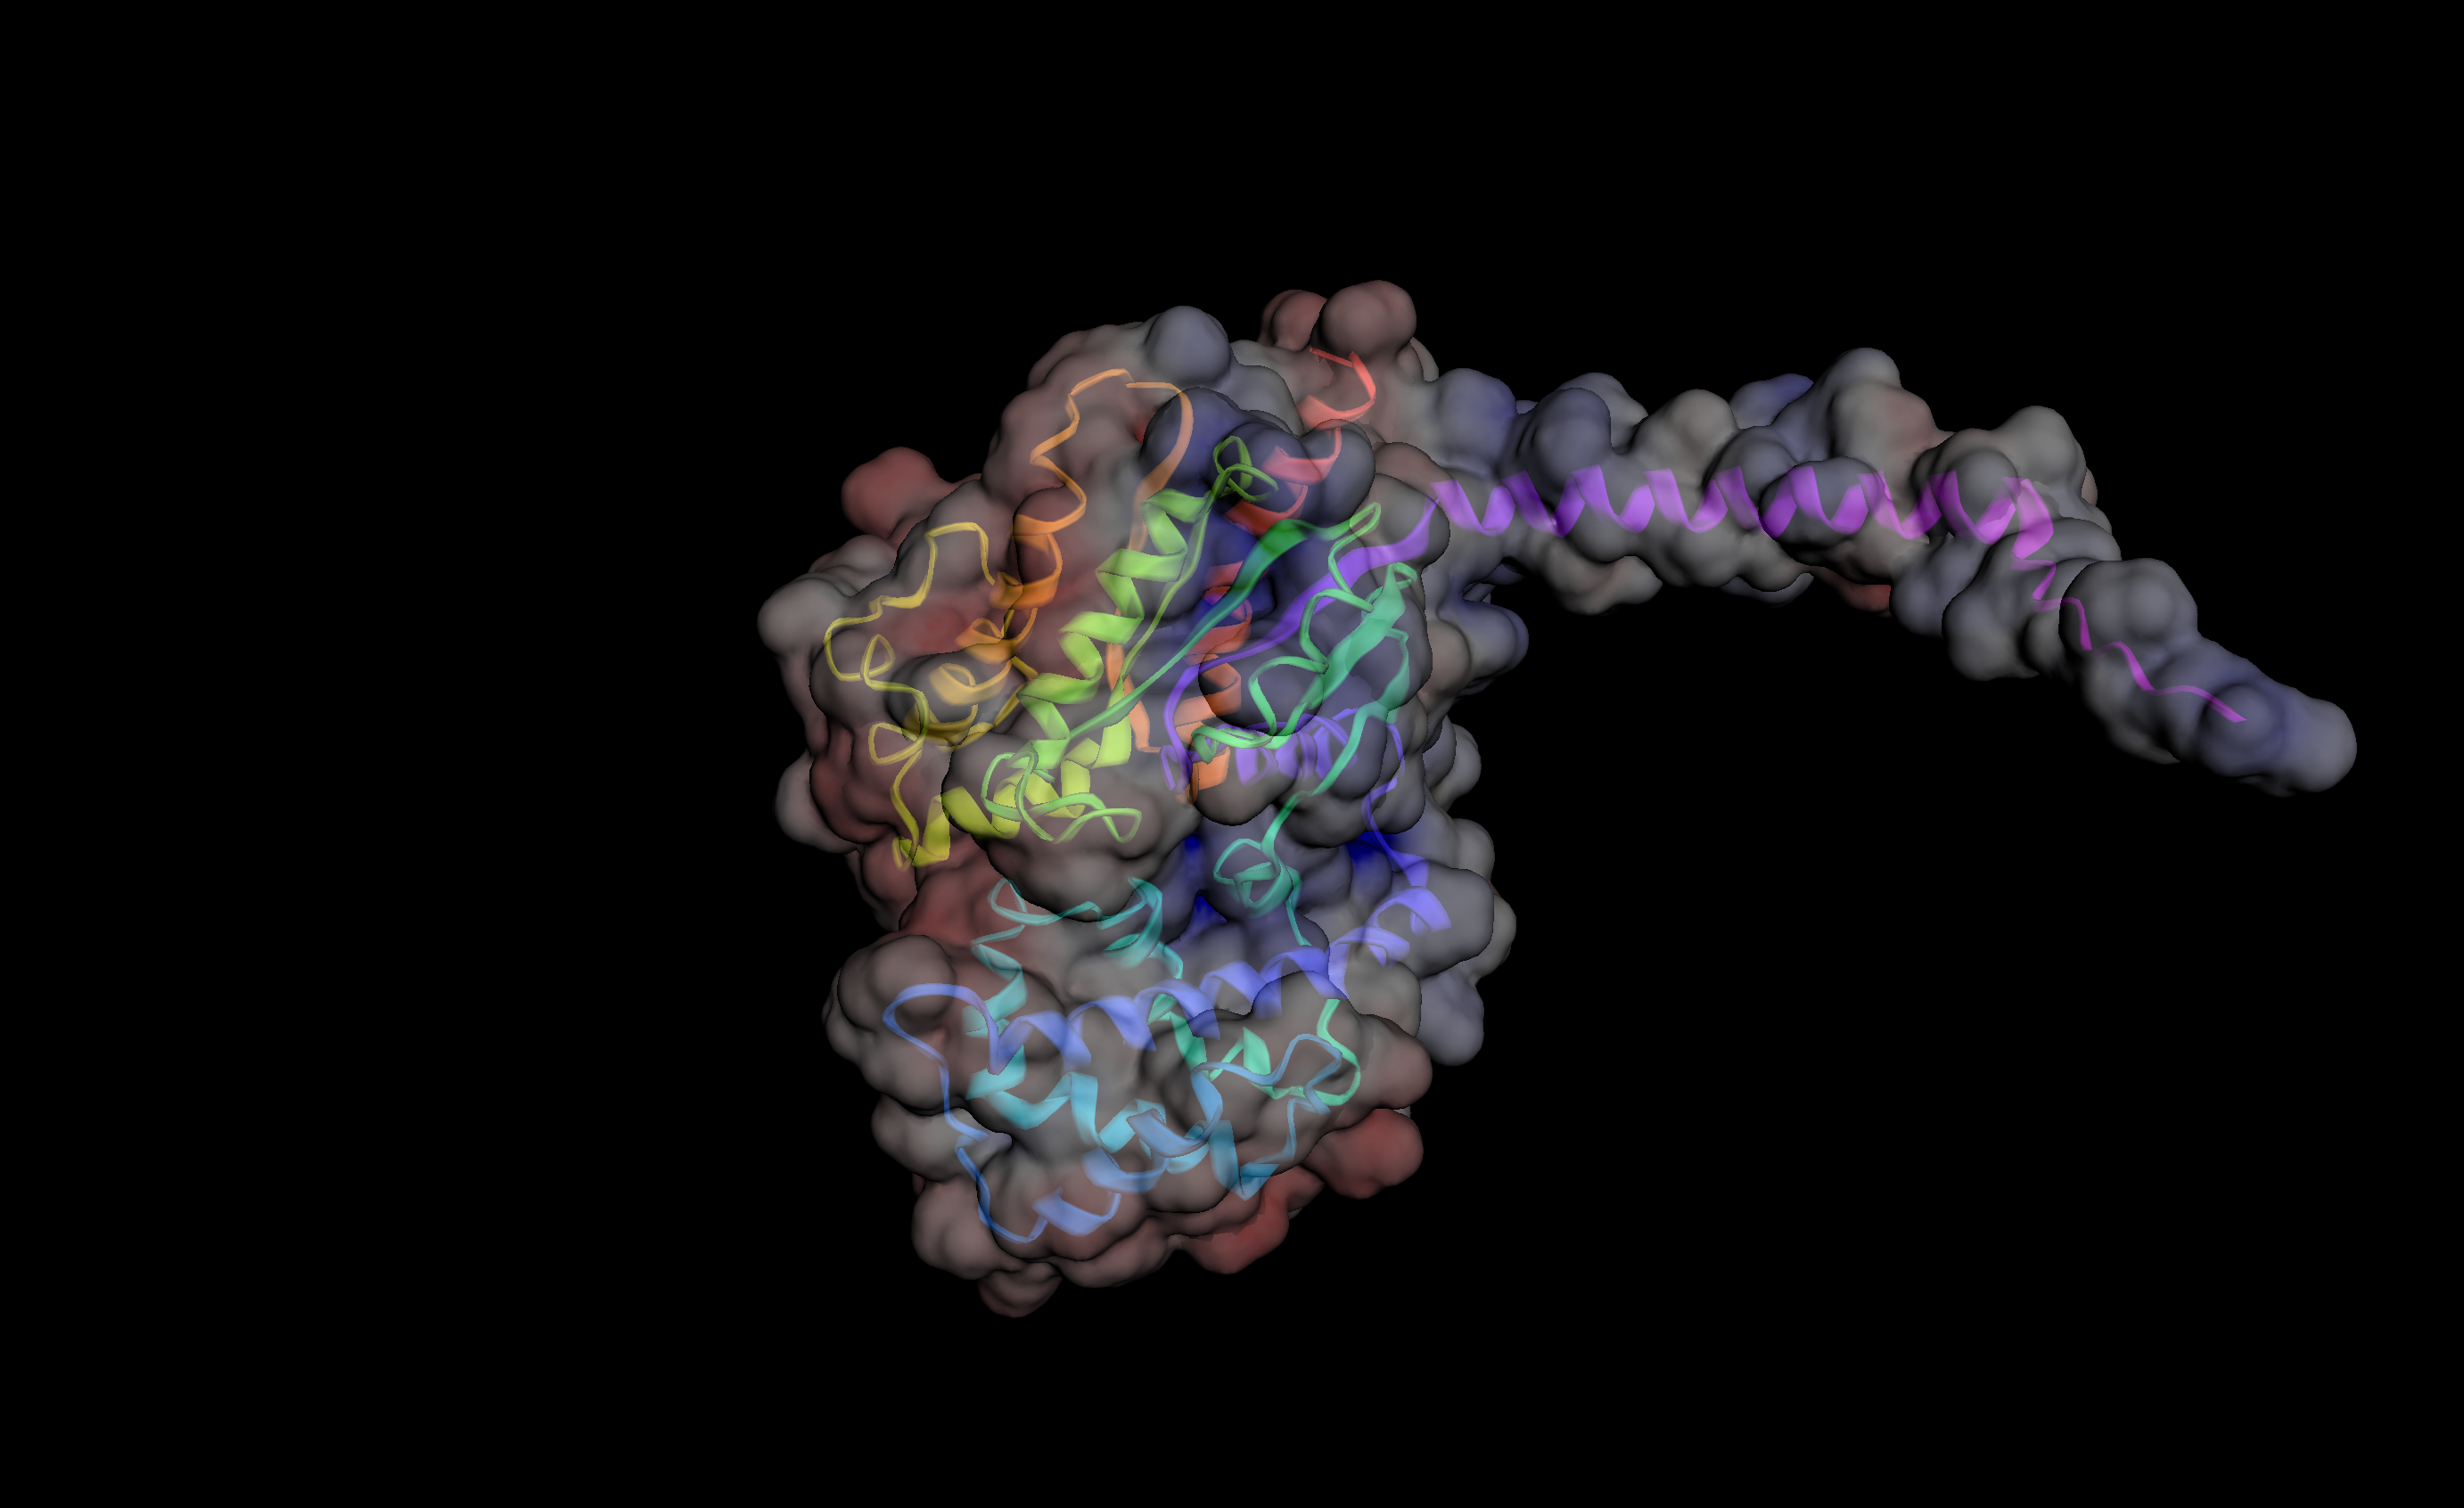

After you have oriented the protein, visualize the molecular surface. Export your image as a PNG file. Rename the file as `[UniProt]-front.png` and put it into your the `exercises/04-Electrostatics/APBS` folder of your shared drive. Also generate images of,
* `[UniProt]-top.png` - facing the C terminal helix 5, which is the interface that contacts with GPCRs.
* `[UniProt]-right.png` - facing the N terminal helix, which is the contact interface with the G protein βγ subunits.

These are the files in my `exercises/04-Electrostatics/APBS` folder:
A8MTJ3-front.png
A8MTJ3-pot.dx
A8MTJ3-right.png
A8MTJ3-top.png
A8MTJ3.pqr
P38405-front.png
P38405-pot.dx
P38405-right.png
P38405-top.png
P38405.pqr

--> Replace my figures and labels in the cells below

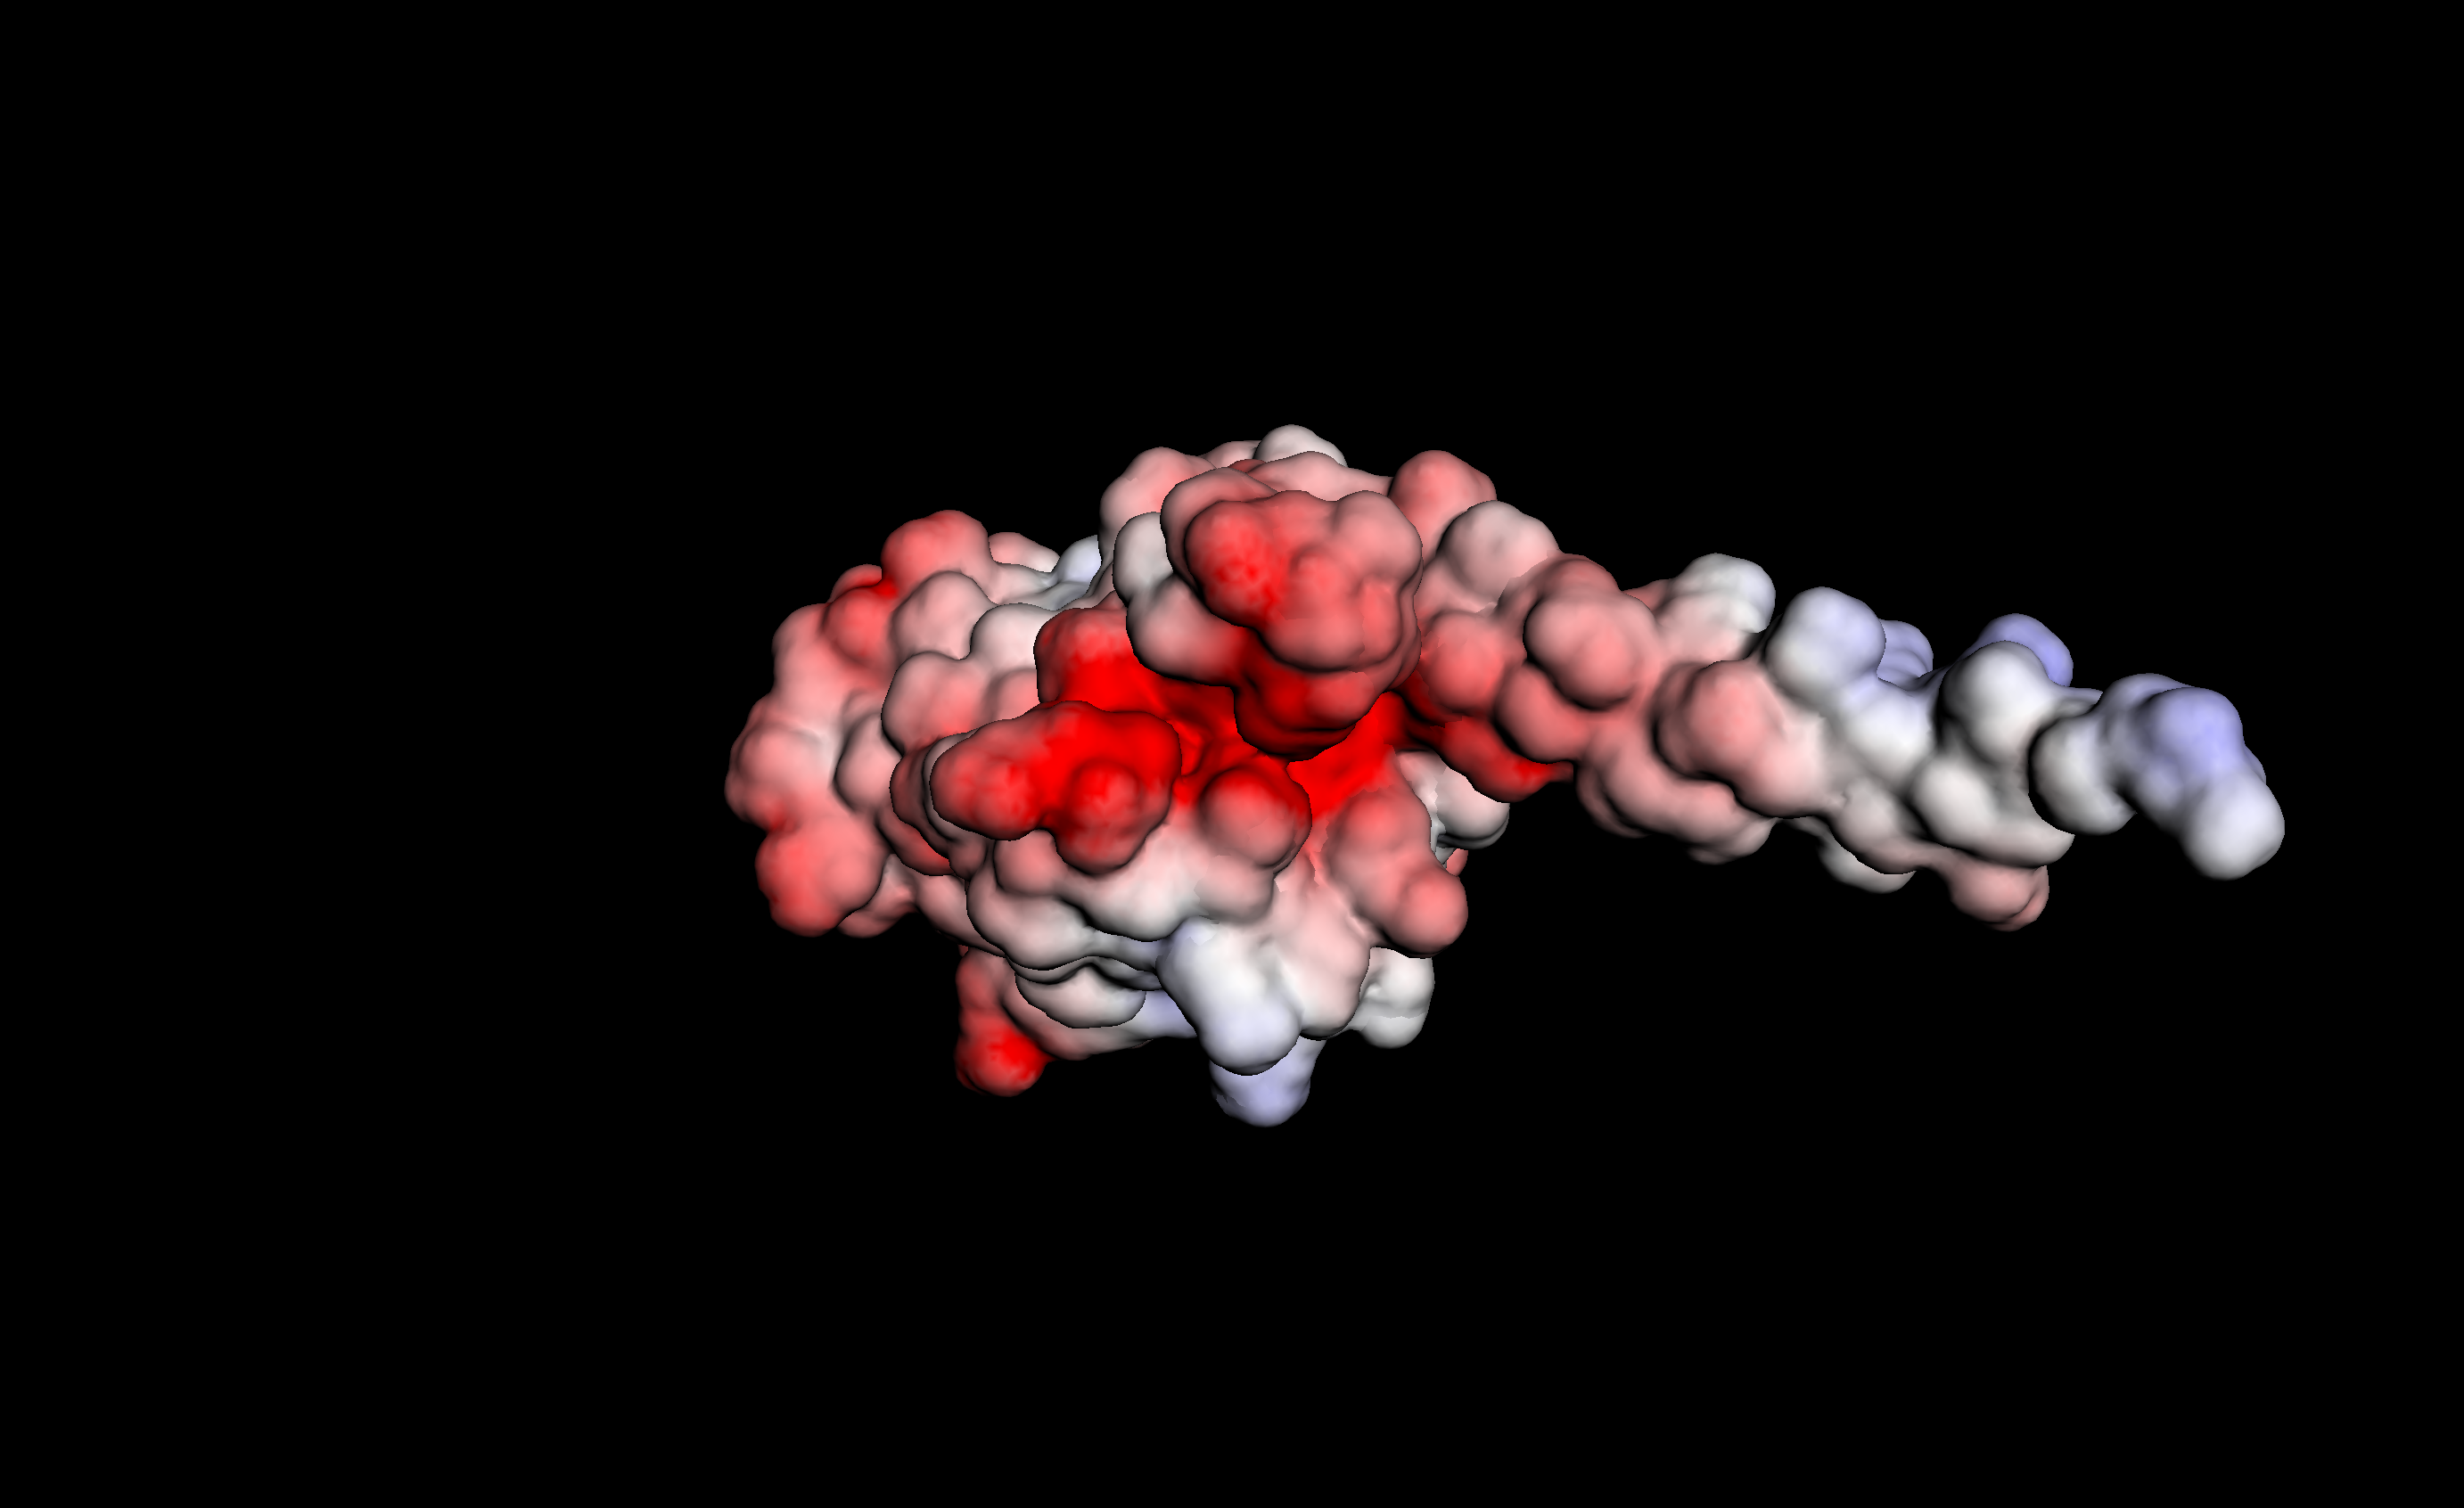
A8MTJ3-top

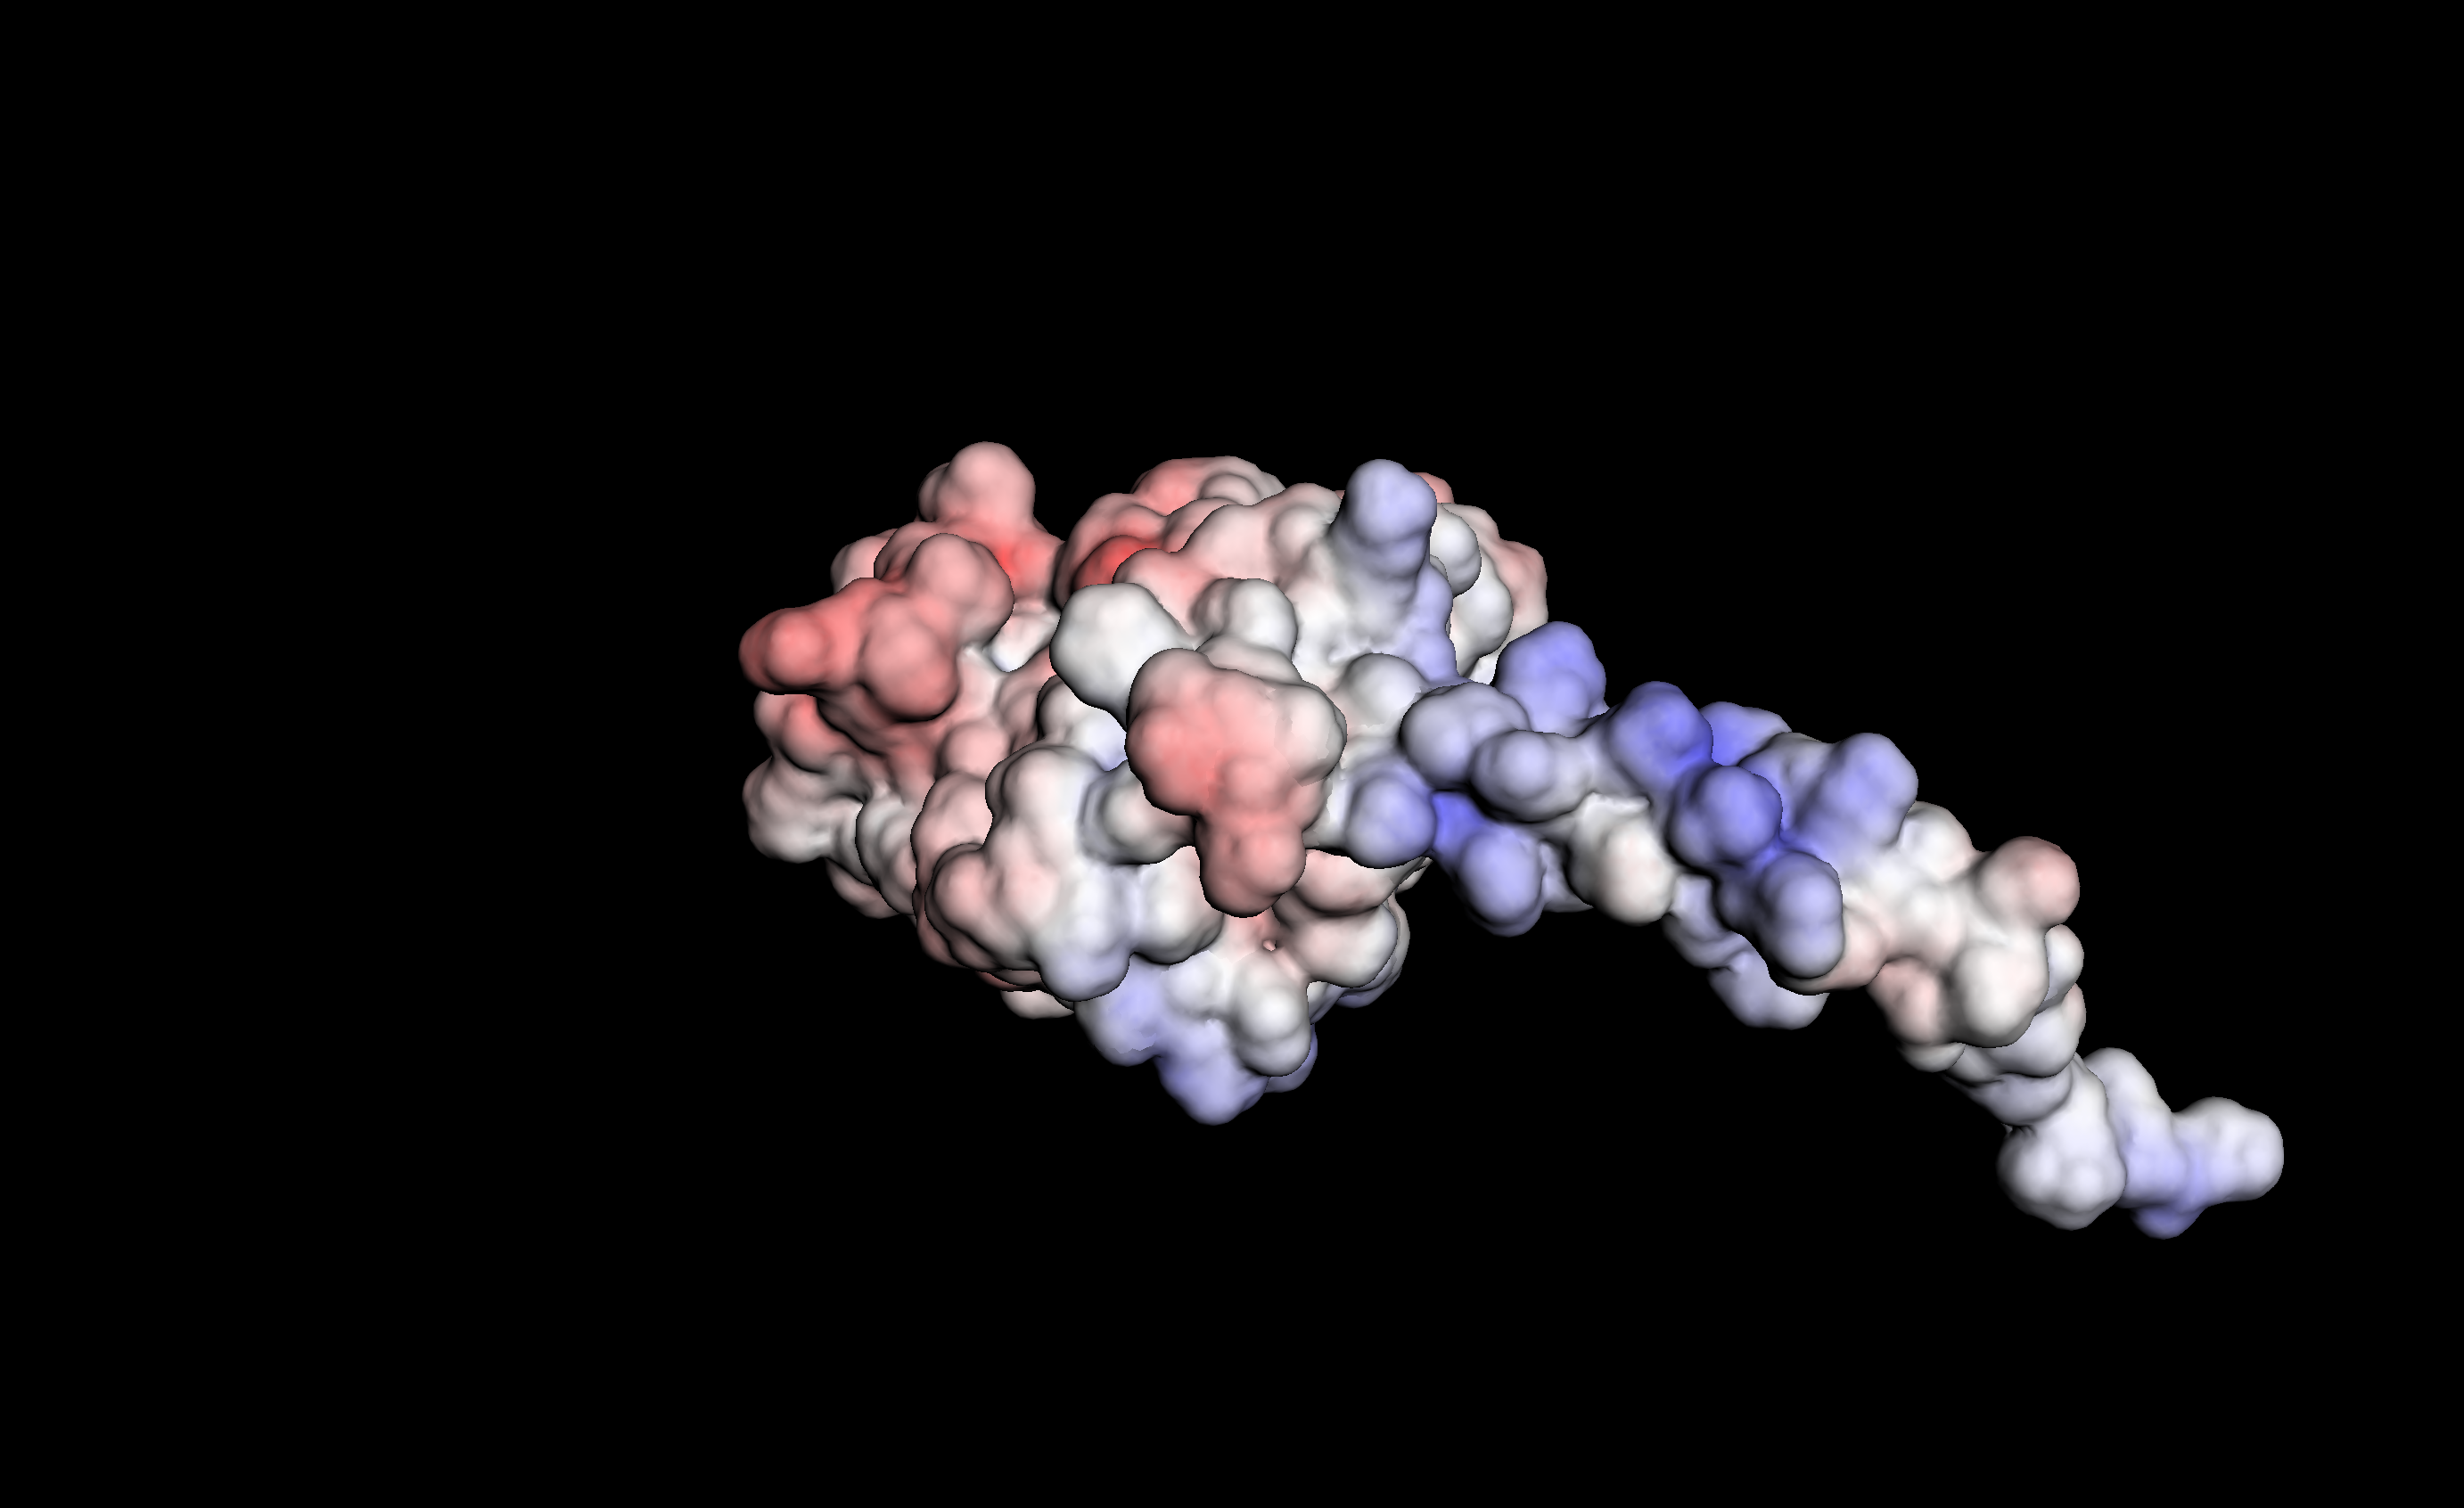
P38405-top

--> Describe the difference between the electrostatic potential at the surfaces of your two proteins at the GPCR binding interface.

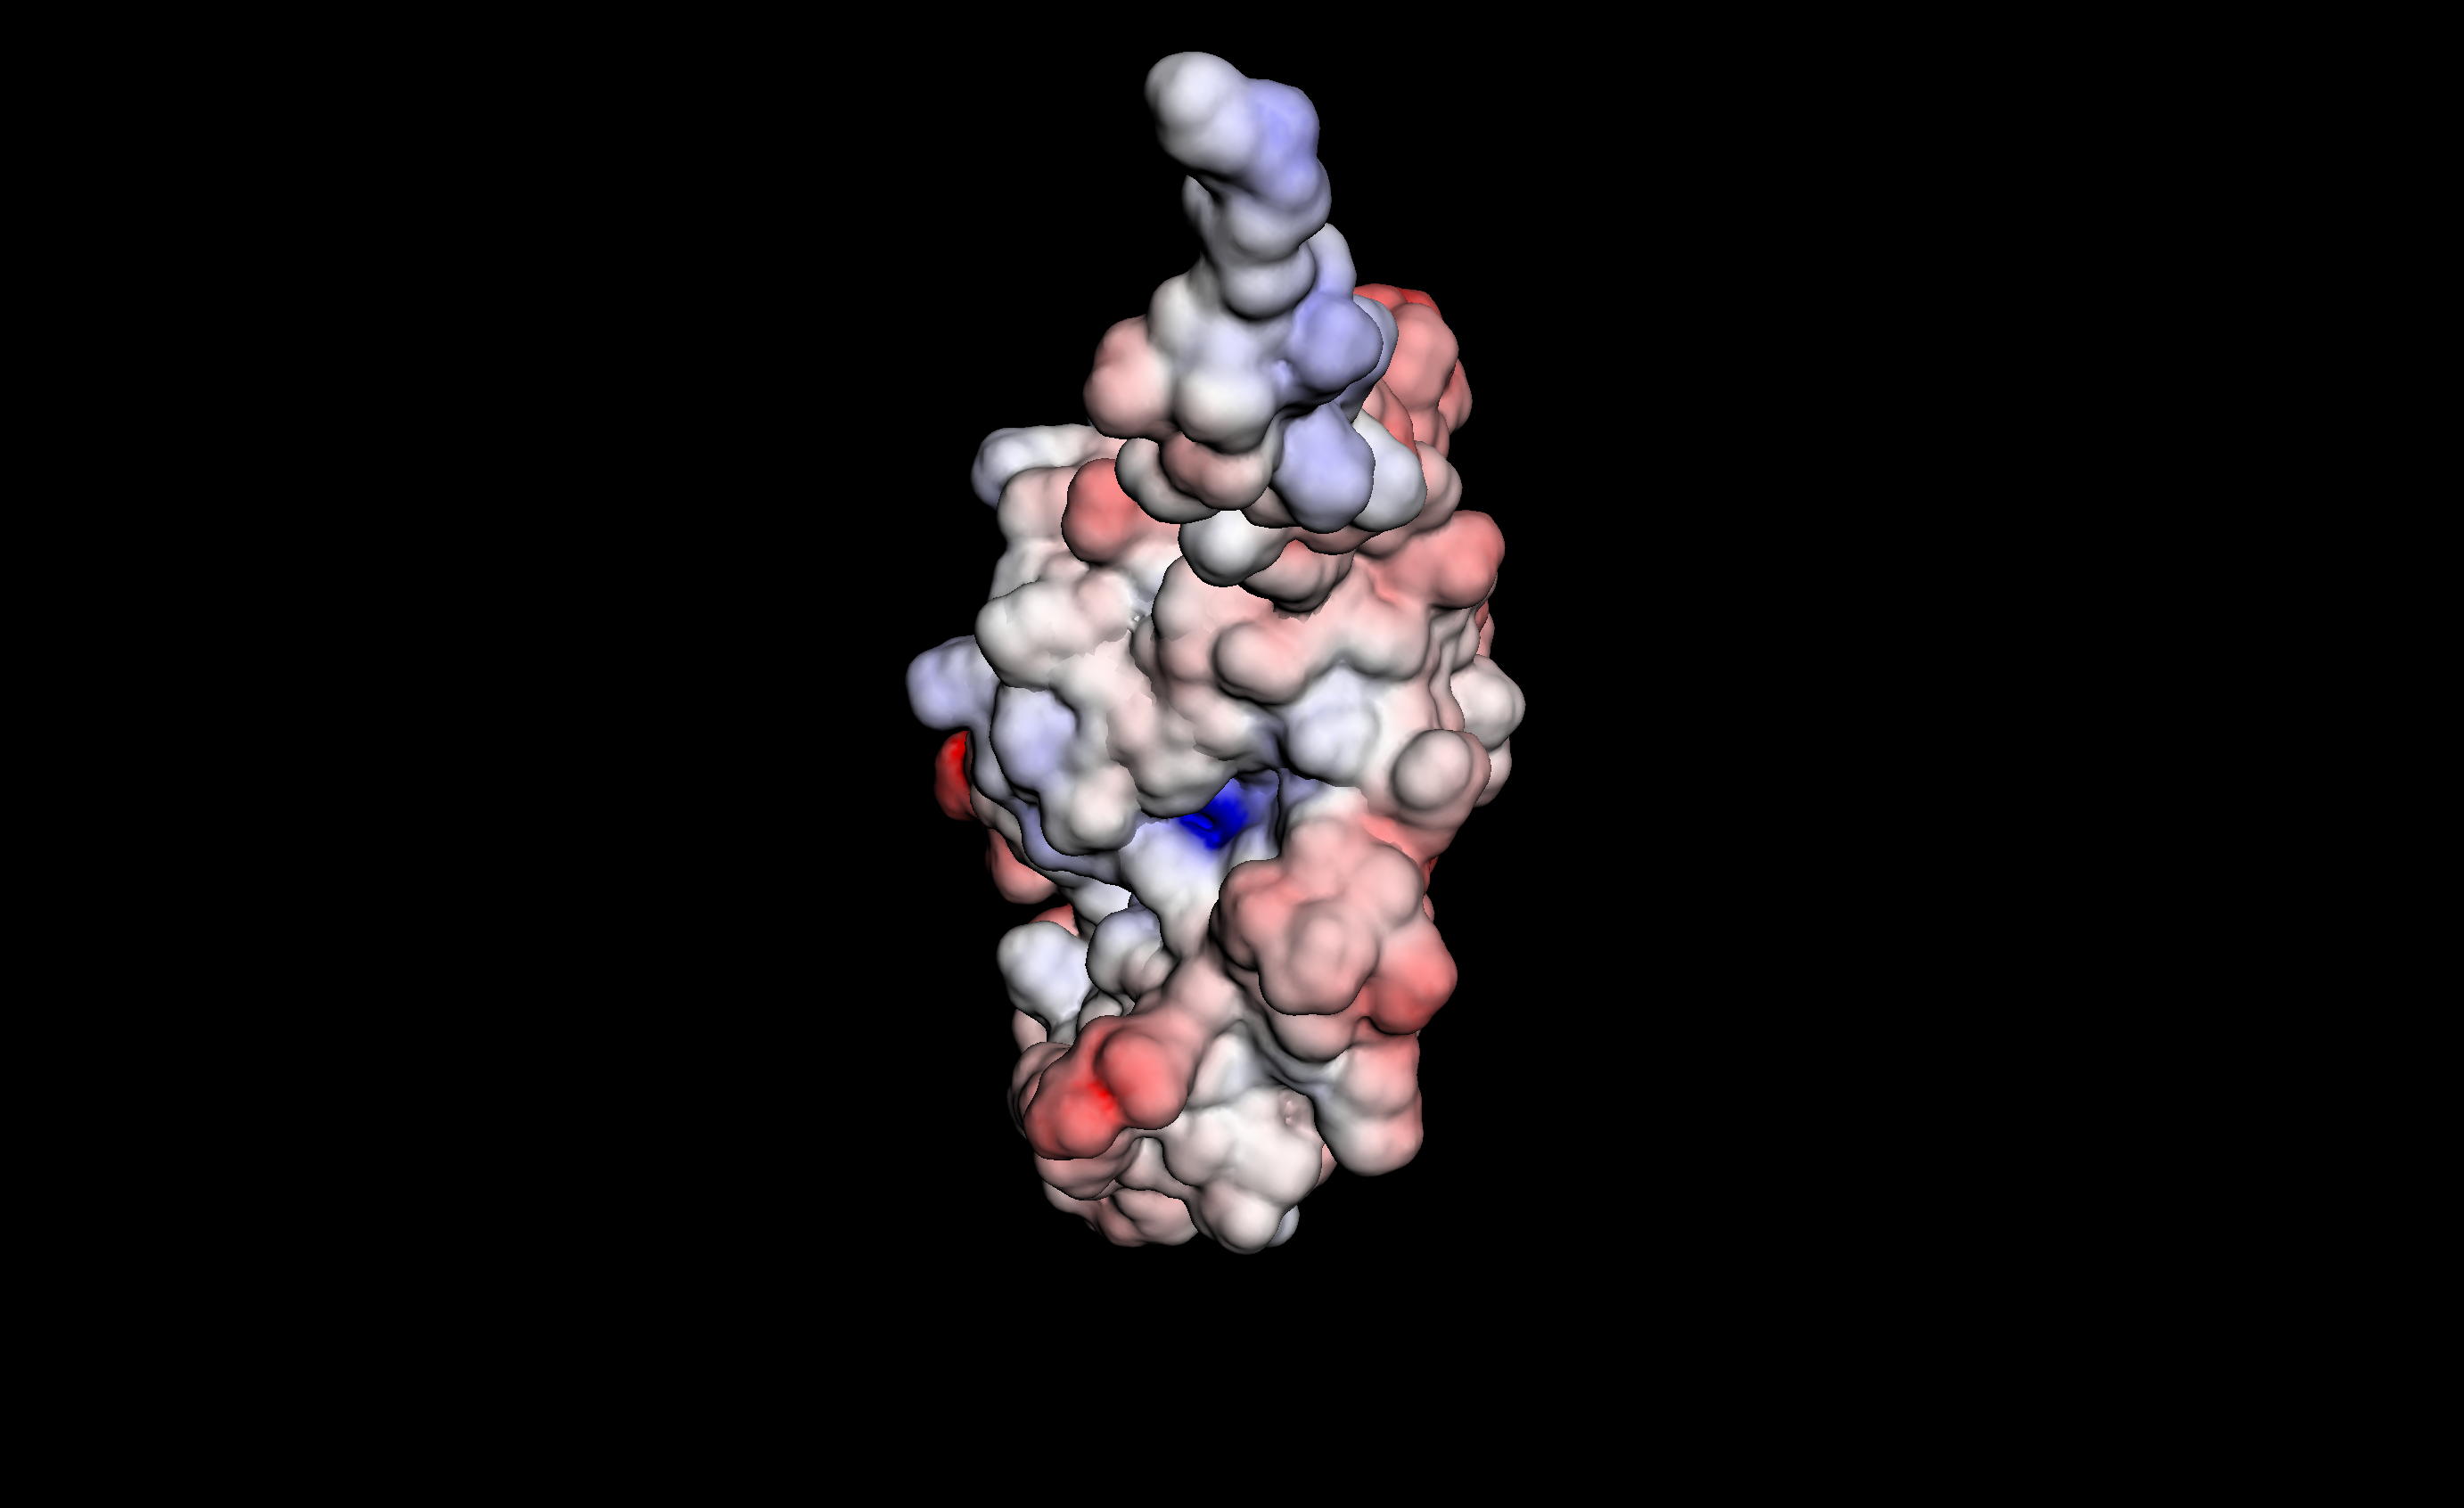
A8MTJ3-right

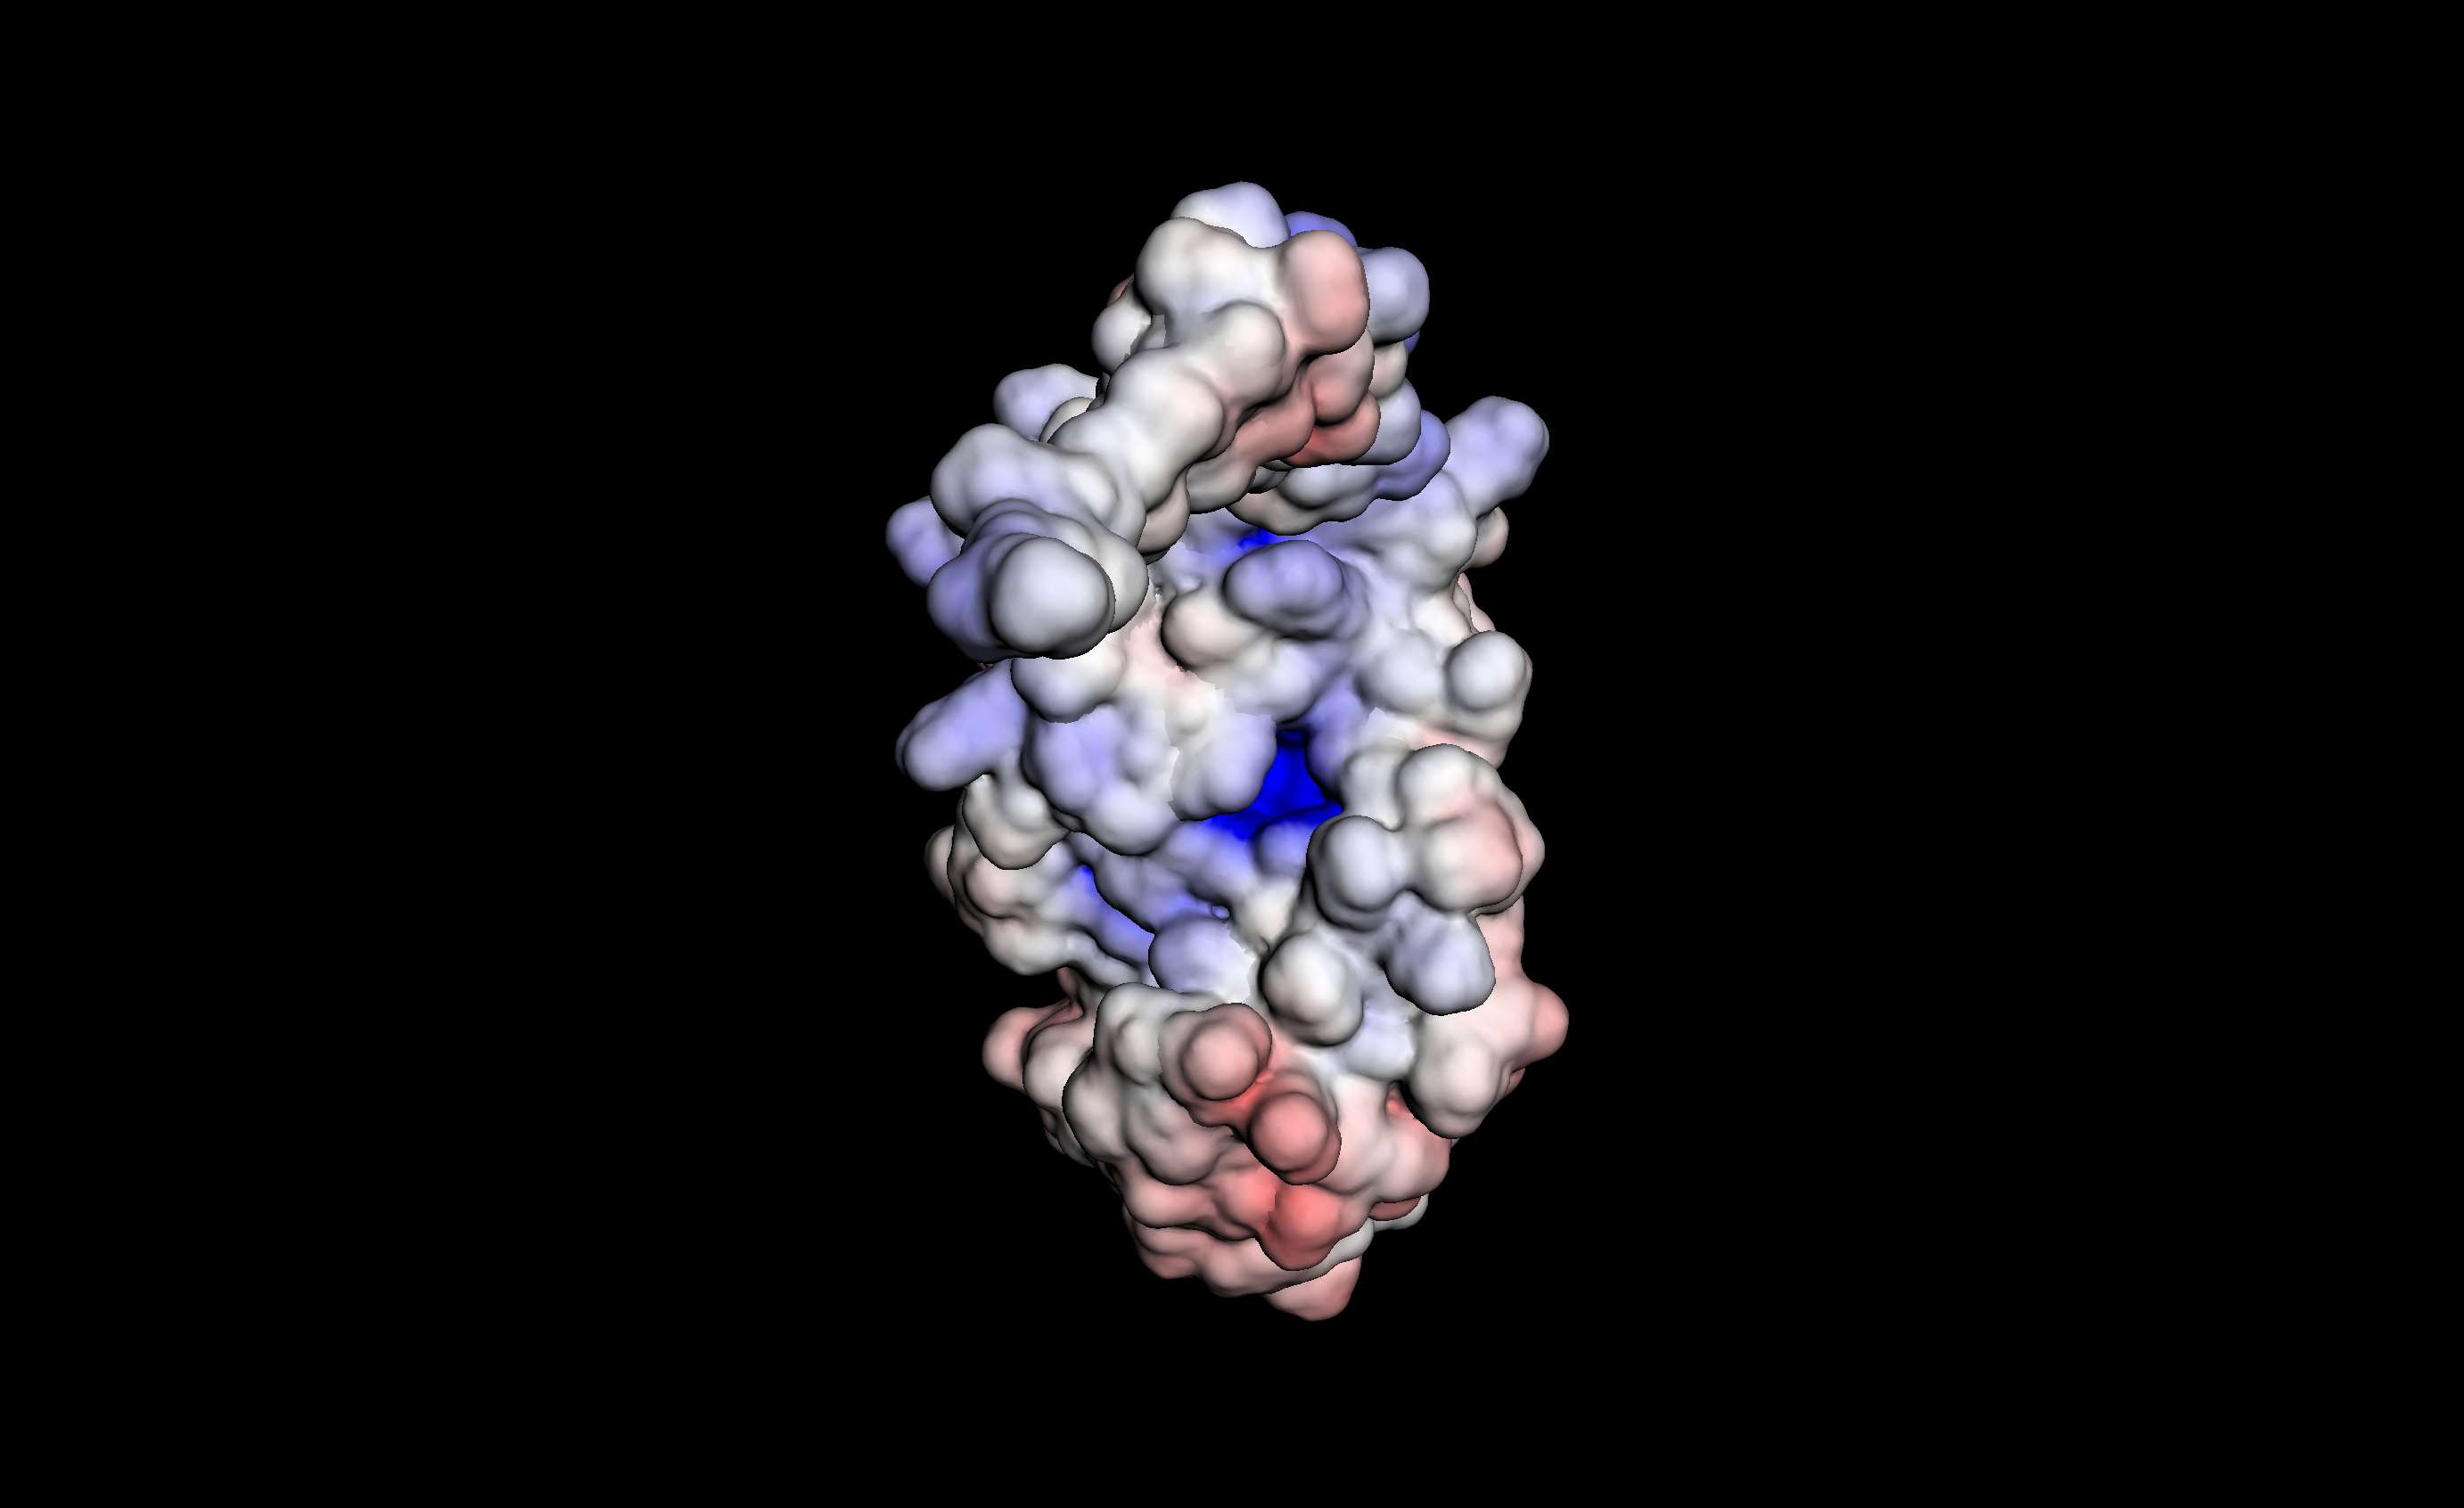P38405-right

--> Describe differences between the electrostatic potential at the surfaces of your two proteins at the Gβγ binding interface.

--> Gα subunits bind GDP, which has two phosphate groups, but GDP was not included in our models. What sign is the electrostatic potential at the phosphate binding site? In Fig. 1 above, phosphates are orange spheres.

# Part II - Downloading and installing the required software for Colab

Now we will do some further analysis in this Google colab notebook. To do this, we will first install **py3Dmol** and **OpenBabel**. The following code cells will install the packages, if you are working on [Google Colab](https://colab.research.google.com/notebooks/intro.ipynb). Installing the [condacolab](https://github.com/jaimergp/condacolab) package will restart the kernel. After you reconnect to the runtime, you can continue with the next cell.

In [ ]:
try:
  import py3Dmol
except:
  !pip install py3Dmol
  import py3Dmol

In [ ]:
try:
    import google.colab
    !pip install -q condacolab
    import condacolab
    condacolab.install()
except ModuleNotFoundError:
    pass

In [ ]:
try:
    import condacolab
    from google.colab import files
    from IPython.display import clear_output
    condacolab.check()
    !conda install -q -y -c conda-forge -c bioconda openbabel
except ModuleNotFoundError:
    on_colab = False
else:
    #check if installation was succesful
    try:
        on_colab = True
        clear_output()  # clear the excessive installation outputs
        print("Dependencies successfully installed!")
    except ModuleNotFoundError:
        print("Error while installing dependencies!")

# Part III - Visualizing protonation

Let's look at all the histidines in one of your Gα subunits. Upload a pqr file to your virtual machine and
edit the code below to load the correct file.

In [ ]:
pqr = open('A8MTJ3.pqr', 'r').read()

for line in pqr.split('\n'):
  if line.find('HI')>-1 and line.find('CA')>-1:
    print(line)

--> What are the residue names? Why should there be multiple names for the same amino acid, histidine? Enter a short answer in this text box.

Now look at the structure of a few histidines. The view below shows the protons on the histidine but not other protein atoms. (py3Dmol will show hydrogen on `.mol` files). Change the `resi` and `chain` variables below to zoom in to a different residue. Can you tell why a certain imidazole is stabilized?

In [ ]:
resi = '176'
chain = 'A'

F = open('resi.pqr','w')
for line in pqr.split('\n'):
  if line[21:26] == f'{chain}{resi:>4s}':
    F.write(line + '\n')
F.close()

!obabel -ipqr resi.pqr -omol -O resi.mol 2> conversion.log
mol = open('resi.mol', 'r').read()

view = py3Dmol.view()
view.setBackgroundColor('white')
view.addModel(mol, 'mol')
view.setStyle({}, {'stick': {'colorscheme':'element'}})
view.addModel(pqr,'pdb')
sel = {'within':{'distance':'7', 'sel':{'and':[{'resi':resi}, {'chain':chain}]}}}
view.setStyle(sel, {'stick': {'colorscheme':'element'}})
view.zoomTo(sel)
view.show()

--> Describe what factors, if any, stabilize specific protonation states of each histidine side chain.

# Part IV - Visualizing isosurfaces

I was unable to get py3Dmol to show volumetric data in Google Colab. As an alternative, let's visualize the results with plot.ly. On your own, you may try visualzing electrostatics using VMD or UCSF Chimera.

First, you need to upload and read the electrostatic potential file (which has the extension `.dx`). Next, change the code below to load your file.

In [ ]:
import numpy as np
F = open('A8MTJ3-pot.dx','r')

# Read the header
line = F.readline()
while line.find('object') == -1:
  line = F.readline()
header = {}
header['counts'] = [int(x) for x in line.split(' ')[-3:]]
for name in ['origin', 'd0', 'd1', 'd2']:
  header[name] = [float(x) for x in F.readline().split(' ')[-3:]]
F.readline()
line = F.readline()
header['npts'] = int(line.split(' ')[9])

# Read the potential
vals = F.read().replace('\n','').split(' ')[:header['npts']]
vals = np.array(vals, dtype=float).reshape(header['counts'])
F.close()
print('The size of the array is ', vals.shape)

The file is too unwieldy to run on Google Colab. We will only use a subset of points

In [ ]:
print('The original size of the array is ', vals.shape)
vals = vals.reshape(header['counts'])
vals = vals[::5,::5,::5]
print('The new size of the array is ', vals.shape)

Now we will visualize a series of isosurfaes using plotly.

In [ ]:
def enable_plotly_in_cell(): # define once
  import IPython
  from plotly.offline import init_notebook_mode
  display(IPython.core.display.HTML('''<script src="/static/components/requirejs/require.js"></script>'''))
  init_notebook_mode(connected=False)

enable_plotly_in_cell()
import plotly.graph_objects as go

X, Y, Z = np.mgrid[:vals.shape[0], :vals.shape[1], :vals.shape[2]]
X = X/header['d0'][0] - header['origin'][0]
Y = Y/header['d1'][1] - header['origin'][1]
Z = Z/header['d2'][2] - header['origin'][2]

fig = go.Figure(data=go.Volume(
    x=X.flatten(),
    y=Y.flatten(),
    z=Z.flatten(),
    value=vals.flatten(),
    isomin=-1,
    isomax=1,
    colorscale='BlueRed_r',
    opacity=0.1, # needs to be small to see through all surfaces
    surface_count=9, # needs to be a large number for good volume rendering
    ))
fig.show()

--> Describe where the electrostatic potential is positive and where it is negative.